In [ ]:
#Import all necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from scipy import stats
from scipy.stats import norm
warnings.filterwarnings('ignore')

In [2]:
#Import CSV file 
df = pd.read_csv('housing_train.csv')
df.head(1)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al


In [3]:
print ('Shape of the data set = >', df.shape )
print ('Dataset information = >',df.info())

Shape of the data set = > (265190, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265190 entries, 0 to 265189
Data columns (total 22 columns):
id                         265190 non-null int64
url                        265190 non-null object
region                     265190 non-null object
region_url                 265190 non-null object
price                      265190 non-null int64
type                       265190 non-null object
sqfeet                     265190 non-null int64
beds                       265190 non-null int64
baths                      265190 non-null float64
cats_allowed               265190 non-null int64
dogs_allowed               265190 non-null int64
smoking_allowed            265190 non-null int64
wheelchair_access          265190 non-null int64
electric_vehicle_charge    265190 non-null int64
comes_furnished            265190 non-null int64
laundry_options            210879 non-null object
parking_options            170055 non-null object
image_url

In [4]:
#Get all Categorical data and get sense of them
cat_col = df.select_dtypes(exclude=[np.number])
cat_col.head(1)

,url,region,region_url,type,laundry_options,parking_options,image_url,description,state
0,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,apartment,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,al


In [5]:
# As the data has been pulled from craigslist and sometimes same ads will be posted every now and then in order to get attention from the viewers and it will become duplicates 
# Try to find any duplicates in the entire data set and remove the same. 
#As seen above, Id,url,image_url,region,description and region_url do not make sense for our analysis. 
#We will drop these features and remove duplicates.

df.drop(columns=['id','url','region_url','image_url','region','description'],axis=1,inplace=True)
df.drop_duplicates(inplace=True)
df.shape

(133608, 16)

In [6]:
df.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,1.336080e+05,1.336080e+05,133608.000000,133608.000000,133608.000000,133608.000000,133608.000000,133608.00000,133608.000000,133608.000000,132889.000000,132889.000000
mean,2.298800e+04,1.232191e+03,1.988391,1.501418,0.671509,0.647993,0.676681,0.08108,0.021024,0.060595,37.569520,-93.620662
std,7.574254e+06,3.249756e+04,4.169329,0.659352,0.469666,0.477598,0.467745,0.27296,0.143465,0.238587,5.928829,18.275186
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-43.533300,-163.894000
25%,8.720000e+02,7.600000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,33.852200,-105.256000
50%,1.175000e+03,9.720000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,38.644800,-87.093100
75%,1.600000e+03,1.200000e+03,3.000000,2.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,41.550900,-81.058800
max,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,102.036000,172.633000


In [7]:
# We can see some odd numbers in price, sqfeet, beds, baths features i.e max price, sqfeet, beds definitely they are typos or purposely entered to grab viewers’ attention
# Let's do some analysis and see what we can do with those numbers

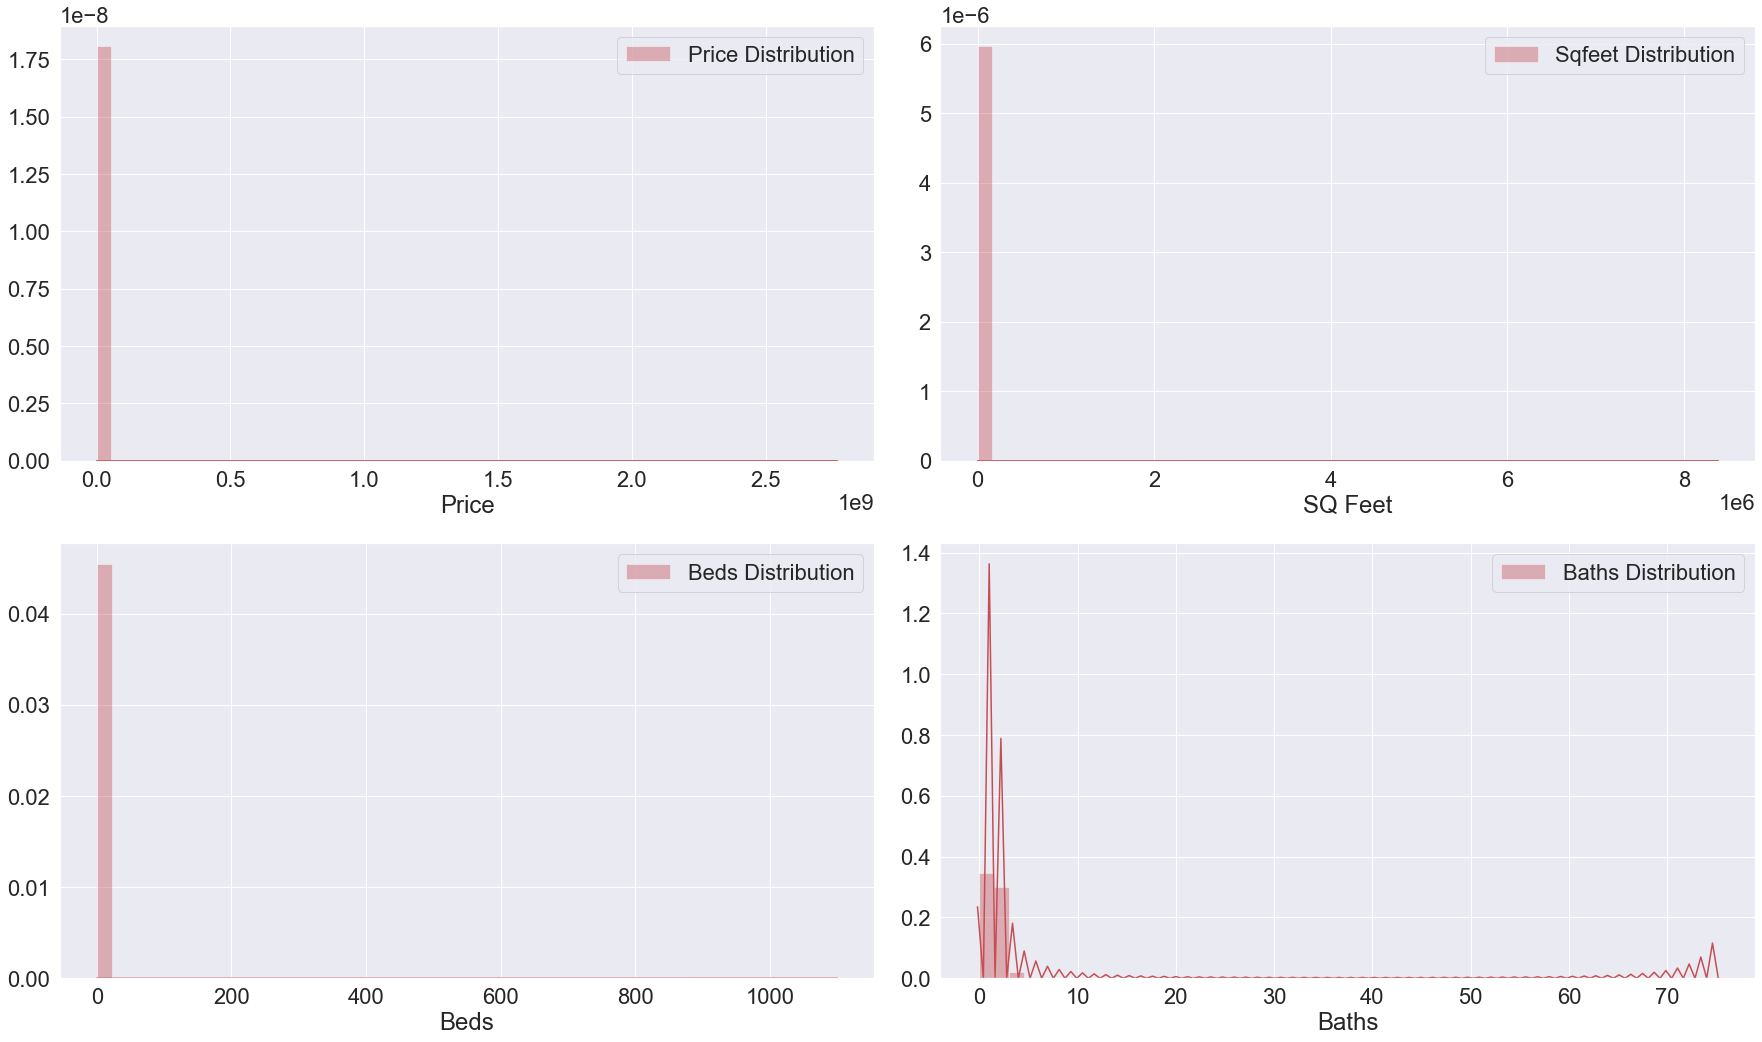

In [8]:
#Plotting distplot to understand the data distribution especially for price,sqfeet,beds,baths
fig = plt.figure(figsize=(25, 15))
sns.set(font_scale=2)

# Price
fig1 = fig.add_subplot(221) 
sns.distplot(df['price'],label='Price Distribution',color='r')
plt.legend()
plt.xlabel('Price')



#Sqfeet 
fig2 = fig.add_subplot(222); 
sns.distplot(df['sqfeet'], label='Sqfeet Distribution',color='r')
plt.legend()
plt.xlabel('SQ Feet')


# Beds
fig3 = fig.add_subplot(223);
sns.distplot(df['beds'], label='Beds Distribution',color='r')
plt.legend()
plt.xlabel('Beds')


# Baths
fig4 = fig.add_subplot(224); 
sns.distplot(df['baths'], label='Baths Distribution',color='r')
plt.legend()
plt.xlabel('Baths')

plt.tight_layout() 
plt.show()

In [9]:
#From Above it is clearly evident that, very few of the data are typos or intentional posting.
# We will remove those outliers instead of analysing 

In [10]:
# Finding % of rent in the population. Checking for 6K
rent_above_6k= df[df['price'] > 6000].shape[0]

#Understanding counts which have more than 5000 sqfeet (As above more than 3000 its more skewed)
sqft_above_5k= df[df['sqfeet'] > 5000].shape[0]

#state
bbs_above_6k= df[df['price'] > 6000]

print ('Above 5K rent  == > {} units and {:.4f} %'.format(rent_above_6k,rent_above_6k/len(df['price'])))
print ('Above 3K sqft  == > {} units and {:.4f} %'.format(sqft_above_5k,sqft_above_5k/len(df['sqfeet'])))
print (' Baths and beds of rent > 5K = >','\n', bbs_above_6k[['beds','baths','sqfeet']].describe())

Above 5K rent  == > 395 units and 0.0030 %
Above 3K sqft  == > 168 units and 0.0013 %
 Baths and beds of rent > 5K = > 
              beds       baths        sqfeet
count  395.000000  395.000000  3.950000e+02
mean     3.308861    2.722785  7.571914e+03
std      1.400072    1.277882  7.232192e+04
min      0.000000    0.000000  5.000000e+01
25%      2.000000    2.000000  1.344000e+03
50%      3.000000    2.500000  2.000000e+03
75%      4.000000    3.500000  3.000000e+03
max      8.000000    8.500000  1.019856e+06


In [11]:
# After breif analysis based on above counts it is clear that, units are negligible in that range.
#we are not going to loose any crucial information even if we delete data where price > 6000 and sqfeet > 5000
df.drop(df[df['price']  > 6000].index,inplace=True)
df.drop(df[df['sqfeet'] > 5000].index,inplace=True)

In [12]:
df.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,133072.000000,133072.000000,133072.000000,133072.000000,133072.000000,133072.000000,133072.000000,133072.000000,133072.000000,133072.000000,132357.000000,132357.000000
mean,1327.494432,1040.833729,1.983460,1.496833,0.672253,0.648506,0.676784,0.080979,0.020951,0.060043,37.575958,-93.582358
std,693.071300,438.649050,4.175956,0.650756,0.469394,0.477439,0.467706,0.272803,0.143221,0.237567,5.929637,18.253602
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,870.000000,760.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.856100,-105.239000
50%,1172.000000,970.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,38.650700,-86.963000
75%,1599.000000,1200.000000,3.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.552600,-81.053000
max,6000.000000,5000.000000,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


In [13]:
# Taking Backup of dataframe just in case.
df_copy = df.copy()

In [14]:
# Price shows zero, lets understand if imputing works and its total number of units in each category. 
#Instead of zero I am checking rent below $ 250, as its difficult to get house for rent at that price.

count = []
counts = df['price'][(df['price'] < 250) & (df['beds'] == 1)].count()
count.append(counts)
counts = df['price'][(df['price'] < 250) & (df['beds'] == 2)].count()
count.append(counts)
counts = df['price'][(df['price'] < 250) & (df['beds'] > 2)].count()
count.append(counts)
print('Zero price with >= 1 beds', count)
print('Total Zero price with >= 1 beds', count[0]+count[1]+count[2])

Zero price with >= 1 beds [273, 280, 160]
Total Zero price with >= 1 beds 713


In [15]:
# Since price is missing for everybedroom and doesn't make sense imputing as they are missing for different states as well
# Better we will drop all price <250 
df.drop(df[df['price']<250].index,inplace=True)

In [16]:
# Similarly Sqfeet shows zero, lets understand on some methods if we can impute  and also check sqfeet less than 250 sqfeet 
count= []
counts = df['sqfeet'][(df['sqfeet']<250) & (df['beds']==1)].count()
count.append(counts)
counts = df['sqfeet'][(df['sqfeet']<250) & (df['beds']==2)].count()
count.append(counts)
counts = df['sqfeet'][(df['sqfeet']<250) & (df['beds']>2)].count()
count.append(counts)
print ('Zero SqFeet with >= 1 beds', count)
print ('Total Zero SqFeet with >= 1 beds', count[0]+count[1]+count[2])


Zero SqFeet with >= 1 beds [239, 193, 134]
Total Zero SqFeet with >= 1 beds 566


In [17]:
df.drop(df[df['sqfeet']<250].index,inplace=True)

In [18]:
# with std 4 lets see the stats
from scipy.stats import zscore

z_score = stats.zscore(df[['price','sqfeet','beds','baths']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 4).all(axis=1)
df_validation = df[filtering_entry]
df_validation.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,129595.000000,129595.000000,129595.000000,129595.000000,129595.000000,129595.000000,129595.000000,129595.000000,129595.000000,129595.000000,128905.000000,128905.000000
mean,1302.487935,1025.175848,1.948339,1.480127,0.676940,0.652078,0.679880,0.079941,0.020510,0.055874,37.588674,-93.405698
std,610.187716,379.947779,0.917189,0.585562,0.467647,0.476313,0.466524,0.271203,0.141738,0.229679,5.928069,18.152513
min,250.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-40.266600,-163.894000
25%,875.000000,760.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.851300,-105.114000
50%,1165.000000,967.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,38.670900,-86.729500
75%,1580.000000,1200.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.561400,-81.048800
max,4086.000000,2781.000000,8.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,94.156100


In [19]:
df.baths.count()

131602

In [20]:
# We see, still bedroom and bath ratio not matching if we look at max number. Baths > beds +2 doesn't make sense.
df = df[df.baths < df.beds+2]
df = df[df.beds < df.baths+2]

In [21]:
# Drop rows which have abnormal relation b/w beds vs price
df.drop(df[(df['beds'] == 0) & (df['price'] > 2000)].index, inplace=True)
df.drop(df[(df['beds'] == 3) & (df['price'] < 800)].index,inplace=True)
df.drop(df[(df['beds'] == 4) & (df['price'] < 1000)].index,inplace=True)
df.drop(df[(df['beds'] == 5) & (df['price'] < 1200)].index,inplace=True)

# Drop rows which have abnormal relation b/w beds vs sqfeet
df.drop(df[(df['beds'] == 2) & (df['sqfeet'] < 350)].index, inplace=True)
df.drop(df[(df['beds'] == 3) & (df['sqfeet'] < 550)].index, inplace=True)
df.drop(df[(df['beds'] == 4) & (df['sqfeet'] < 800)].index, inplace=True)
df.drop(df[(df['beds'] == 0) & (df['sqfeet'] > 800)].index, inplace=True)


# Drop which have very less records and also not needed for house prediction
df.drop(df[df['type']=='land'].index,inplace=True)
df.drop(df[df['type']=='loft'].index,inplace=True)
df.drop(df[df['type']=='in-law'].index,inplace=True)
df.drop(df[df['type']=='assisted living'].index,inplace=True)

In [22]:
z_score = stats.zscore(df[['price','sqfeet','beds','baths']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis=1)
df = df[filtering_entry]
df.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,114317.000000,114317.000000,114317.000000,114317.000000,114317.000000,114317.000000,114317.000000,114317.000000,114317.000000,114317.00000,113787.000000,113787.000000
mean,1281.078195,971.784407,1.786882,1.453668,0.694271,0.665422,0.681745,0.081064,0.019761,0.05022,37.498346,-93.568383
std,547.879588,318.542066,0.765036,0.537799,0.460717,0.471845,0.465801,0.272935,0.139178,0.21840,5.959987,18.195279
min,250.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-40.266600,-163.894000
25%,885.000000,750.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,33.801800,-105.147000
50%,1165.000000,939.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,38.586300,-86.804500
75%,1550.000000,1142.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,41.501200,-81.094150
max,3372.000000,2216.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,102.036000,94.156100


In [23]:
#understanding the null values
only_null = df.columns[df.isnull().any()]
df[only_null].isnull().sum()

laundry_options    20156
parking_options    35533
lat                  530
long                 530
state                  1
dtype: int64

In [24]:
#let’s see if any state has nulls
null_cols = df.columns[df.isnull().any()]
print (df[df['state'].isnull()][null_cols])

       laundry_options  parking_options  lat  long state
265189     w/d hookups  attached garage  NaN   NaN   NaN


In [25]:
# Check closest state and use either ffill or bfill
df['state'].loc[265186:265191]

265186     oh
265188     oh
265189    NaN
Name: state, dtype: object

In [26]:
# Seems last record is missing and we can use ffill method
df['state'].fillna(method='ffill',inplace=True)
print (df[df['state'].isnull()][null_cols])

Empty DataFrame
Columns: [laundry_options, parking_options, lat, long, state]
Index: []


In [27]:
#Forward fill for laundray and parking and lat and long
df['laundry_options'].fillna(method='ffill',inplace=True)
df['parking_options'].fillna(method='ffill',inplace=True)
df['lat'].fillna(method='ffill',inplace=True)
df['long'].fillna(method='ffill',inplace=True)


#If anything leftover, then we fill them with backfill method
df['laundry_options'].fillna(method='bfill',inplace=True)
df['parking_options'].fillna(method='bfill',inplace=True)
df['lat'].fillna(method='bfill',inplace=True)
df['long'].fillna(method='bfill',inplace=True)


In [28]:
df.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,114317.000000,114317.000000,114317.000000,114317.000000,114317.000000,114317.000000,114317.000000,114317.000000,114317.000000,114317.00000,114317.000000,114317.000000
mean,1281.078195,971.784407,1.786882,1.453668,0.694271,0.665422,0.681745,0.081064,0.019761,0.05022,37.504792,-93.569325
std,547.879588,318.542066,0.765036,0.537799,0.460717,0.471845,0.465801,0.272935,0.139178,0.21840,5.965841,18.199246
min,250.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-40.266600,-163.894000
25%,885.000000,750.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,33.806300,-105.147000
50%,1165.000000,939.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,38.594300,-86.804500
75%,1550.000000,1142.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,41.506100,-81.088300
max,3372.000000,2216.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,102.036000,94.156100


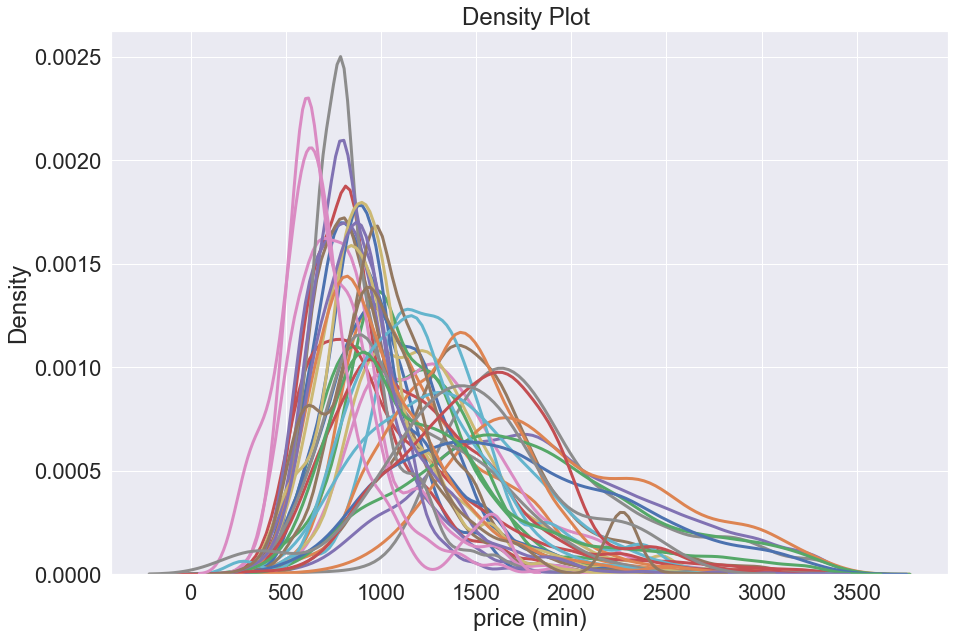

In [29]:
# We will try to understand using density plot and see what is going on with each state vs price
states_name = df['state'].unique()

plt.figure(figsize=(15,10))
for i in states_name:
    subset = df[df['state'] == i]
    sns.distplot(subset['price'],hist=False,kde=True,kde_kws={'linewidth':3})
    
plt.title('Density Plot ')
plt.xlabel('price (min)')
plt.ylabel('Density')
plt.show()

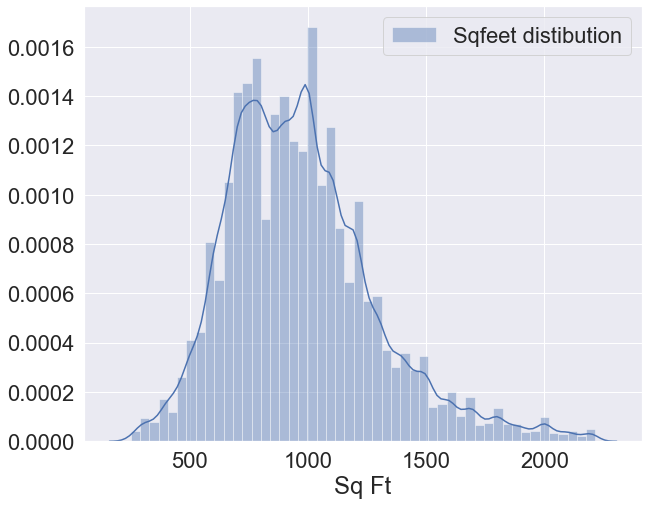

In [30]:
# Understanding sqfeet distribution
plt.figure(figsize=(10,8))
sns.distplot(df['sqfeet'],label='Sqfeet distibution')
plt.legend()
plt.xlabel('Sq Ft')
plt.show()


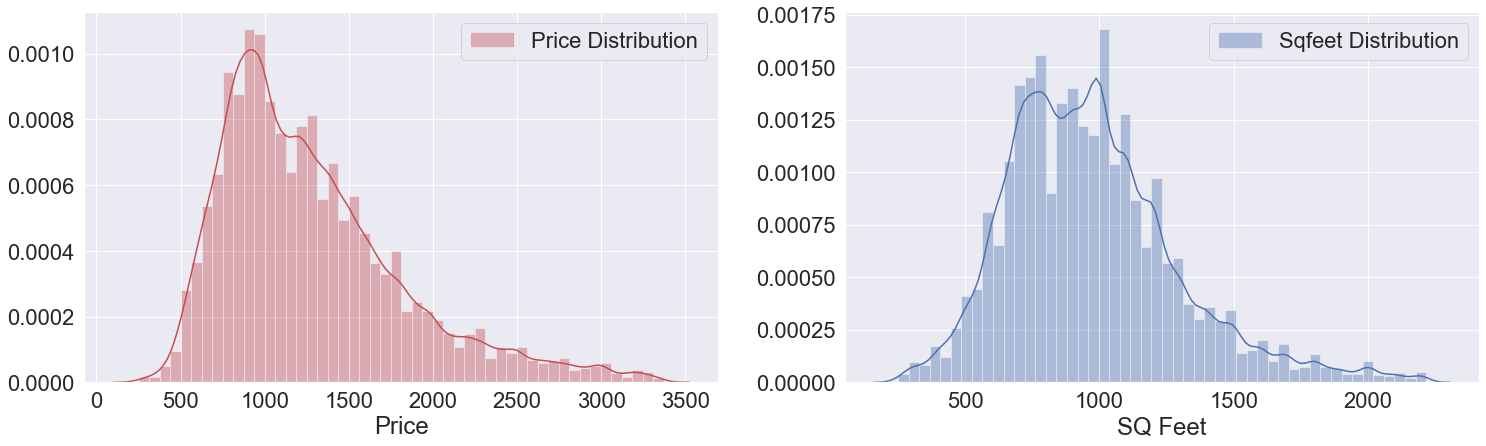

In [31]:
# Revalidating data distribution
fig = plt.figure(figsize=(25, 15))
sns.set(font_scale=2)

# Price
fig1 = fig.add_subplot(221) 
sns.distplot(df['price'],label='Price Distribution',color='r')
plt.legend()
plt.xlabel('Price')

#Sqfeet 
fig2 = fig.add_subplot(222); 
sns.distplot(df['sqfeet'], label='Sqfeet Distribution',color='b')
plt.legend()
plt.xlabel('SQ Feet')

plt.show()

In [32]:
df.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,114317.000000,114317.000000,114317.000000,114317.000000,114317.000000,114317.000000,114317.000000,114317.000000,114317.000000,114317.00000,114317.000000,114317.000000
mean,1281.078195,971.784407,1.786882,1.453668,0.694271,0.665422,0.681745,0.081064,0.019761,0.05022,37.504792,-93.569325
std,547.879588,318.542066,0.765036,0.537799,0.460717,0.471845,0.465801,0.272935,0.139178,0.21840,5.965841,18.199246
min,250.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-40.266600,-163.894000
25%,885.000000,750.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,33.806300,-105.147000
50%,1165.000000,939.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,38.594300,-86.804500
75%,1550.000000,1142.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,41.506100,-81.088300
max,3372.000000,2216.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,102.036000,94.156100


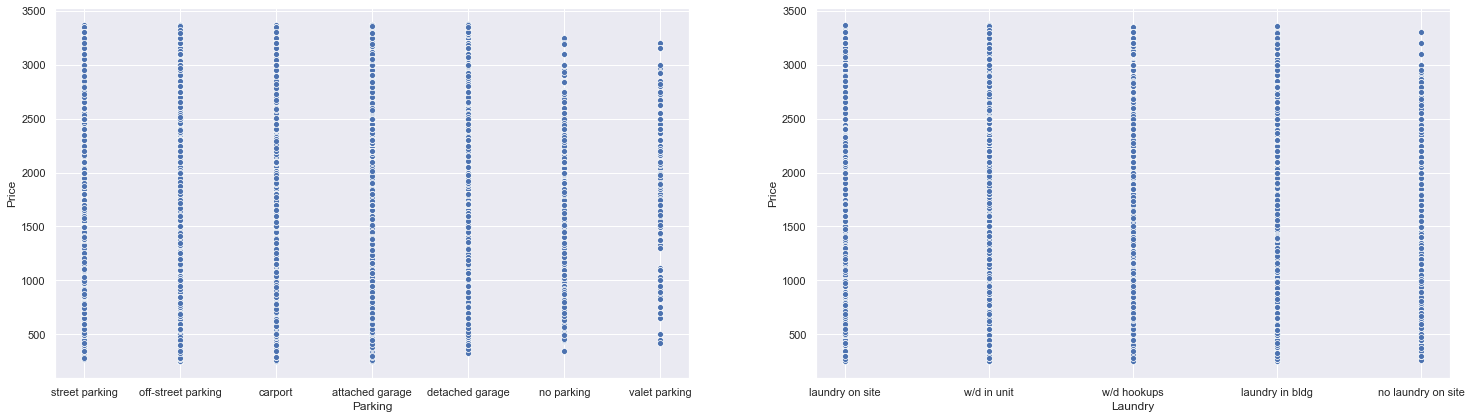

In [33]:
# Let's understand how parking and laundry correlated with price. Then we can decide how to handle the null.
fig = plt.figure(figsize=(25,15))
sns.set(font_scale=1)

fig1 = fig.add_subplot(221)
sns.scatterplot(df['parking_options'],df['price'])
plt.xlabel('Parking')
plt.ylabel('Price')

fig2 = fig.add_subplot(222)
sns.scatterplot(df['laundry_options'],df['price'])
plt.xlabel('Laundry')
plt.ylabel('Price')

plt.show()

In [34]:
# Understanding of price w.r.t parking options, so that we can encode accordingly
parking = df.parking_options.unique()
for options in parking:
    print (options,'Mean price is ====>{}'.format(round(df['price'][df['parking_options']== options].mean(),0)))


street parking Mean price is ====>1236.0
off-street parking Mean price is ====>1130.0
carport Mean price is ====>1385.0
attached garage Mean price is ====>1539.0
detached garage Mean price is ====>1431.0
no parking Mean price is ====>1267.0
valet parking Mean price is ====>1711.0


In [35]:
# Understanding of price w.r.t laundry options, so that we can encode accordingly
laundry = df.laundry_options.unique()
for options in laundry:
    print (options,'Mean price is ====>{}'.format(round(df['price'][df['laundry_options']== options].mean(),0)))


laundry on site Mean price is ====>1169.0
w/d in unit Mean price is ====>1447.0
w/d hookups Mean price is ====>1100.0
laundry in bldg Mean price is ====>1127.0
no laundry on site Mean price is ====>1020.0


In [36]:
apt_type = df.type.unique()
for prc in apt_type:
    print (prc,'Mean price is ====>{}'.format(round(df['price'][df['type']== prc].mean(),0)))

apartment Mean price is ====>1263.0
house Mean price is ====>1340.0
townhouse Mean price is ====>1400.0
condo Mean price is ====>1578.0
manufactured Mean price is ====>956.0
duplex Mean price is ====>1221.0
flat Mean price is ====>1568.0
cottage/cabin Mean price is ====>1227.0


In [37]:
# As we can see in parking and laundry has some kind of contributions in price.
# Considering these categorical features are ordinal , will replace accordingly

# Parking customized encoding
df['parking_options'].replace({'street parking':2, 'off-street parking':1, 'carport':4,
                'attached garage':6, 'detached garage':5, 'no parking':3,
                'valet parking':7},inplace=True)

# Laundry encoding
df['laundry_options'].replace({'no laundry on site':1, 'laundry in bldg':2, 'w/d hookups':2,
                'laundry on site':2, 'w/d in unit':3},inplace=True)

# Apt type encoding
df['type'].replace({'manufactured':1, 'cottage/cabin':2, 'duplex':2,
                'apartment':2, 'townhouse':3,'house':3,'condo':4,'flat':4},inplace=True)


In [38]:
#Check houses listed in each state
state_units= df['state'].value_counts(ascending=False)
state_units

ca    15817
fl    13136
nc     7240
mi     6323
co     5451
ny     5162
ga     4377
il     4013
mn     3987
md     3559
az     3264
ia     3239
oh     2937
la     2917
in     2574
id     2399
ma     2219
nj     2194
ks     2188
al     2042
ky     1982
ct     1795
dc     1702
ar     1445
ak     1401
nv     1375
nm     1347
ms     1287
ne     1229
hi     1218
nh      893
de      846
mo      843
mt      790
nd      739
me      311
or       38
ok       38
Name: state, dtype: int64

In [39]:
len(df.state.unique())

38

In [40]:
# Less than 1000 units we can keep in one group, so that we can minimize the dimension later part.
other_state = state_units[state_units < 1000]
df.state = df.state.apply(lambda x : 'others' if x in other_state else x)
len(df.state.unique())

31

In [41]:
# Recode states using get dummies
df_dummy = pd.get_dummies(df['state'],prefix='state')
df = pd.concat([df,df_dummy.drop('state_others',axis='columns')],axis=1)

In [42]:
# Delete Parking,Laundry,Type,state and also delete other non-contributing features (and also one of the correlated feature i.e dog/cats allowed)
df.drop(columns=['wheelchair_access','electric_vehicle_charge','smoking_allowed','dogs_allowed','state'],axis=1,inplace=True)

In [43]:
df.describe()

,price,type,sqfeet,beds,baths,cats_allowed,comes_furnished,laundry_options,parking_options,lat,...,state_mi,state_mn,state_ms,state_nc,state_ne,state_nj,state_nm,state_nv,state_ny,state_oh
count,114317.000000,114317.000000,114317.000000,114317.000000,114317.000000,114317.000000,114317.00000,114317.000000,114317.000000,114317.000000,...,114317.000000,114317.000000,114317.000000,114317.000000,114317.000000,114317.000000,114317.000000,114317.000000,114317.000000,114317.000000
mean,1281.078195,2.186193,971.784407,1.786882,1.453668,0.694271,0.05022,2.464515,2.834058,37.504792,...,0.055311,0.034877,0.011258,0.063333,0.010751,0.019192,0.011783,0.012028,0.045155,0.025692
std,547.879588,0.490238,318.542066,0.765036,0.537799,0.460717,0.21840,0.534552,2.052714,5.965841,...,0.228588,0.183468,0.105506,0.243561,0.103128,0.137201,0.107909,0.109011,0.207645,0.158215
min,250.000000,1.000000,250.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,-40.266600,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,885.000000,2.000000,750.000000,1.000000,1.000000,0.000000,0.00000,2.000000,1.000000,33.806300,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1165.000000,2.000000,939.000000,2.000000,1.000000,1.000000,0.00000,2.000000,2.000000,38.594300,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1550.000000,2.000000,1142.000000,2.000000,2.000000,1.000000,0.00000,3.000000,5.000000,41.506100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3372.000000,4.000000,2216.000000,4.000000,3.000000,1.000000,1.00000,3.000000,7.000000,102.036000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
# Dont find any multicollinearity. Going for model creation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler 

In [45]:
lr = LinearRegression()
X = df.drop(columns=['price'],axis=1)
y = df['price']

In [46]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

X_train,x_test,Y_train,y_test = train_test_split(X_scaler,y,random_state= 0)
lr.fit(X_train,Y_train)
y_pred = lr.predict(x_test)

r2_score(y_test,y_pred)

0.5330449326441131

In [47]:
# Adjusted R2
def adj_r2(x,y):
    r2 = lr.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [48]:
print ('Adj.R square Train = >',adj_r2(X_train,Y_train))
print ('Adj.R square Test  = >',adj_r2(x_test,y_test))
print ('R square Test ====== >',r2_score(y_test,y_pred))

Adj.R square Train = > 0.5284521059510745
Adj.R square Test  = > 0.5323904527150954
R square Test ====== > 0.5330449326441131


In [49]:
#Checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['score'] = [variance_inflation_factor(X_scaler, i) for i in range(X_scaler.shape[1])]
vif['feature'] = X.columns
vif

,score,feature
0,1.186374,type
1,3.113395,sqfeet
2,2.994325,beds
3,2.419895,baths
4,1.078461,cats_allowed
5,1.026210,comes_furnished
6,1.150834,laundry_options
7,1.262271,parking_options
8,13.955791,lat
9,12.370301,long


In [50]:
# Using K fold cross validation to measure the model accuracy
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),X_scaler,y,cv=cv)

array([0.5368636 , 0.53310877, 0.52301749, 0.52470446, 0.53003044])

In [51]:
# We see almost same score in K-fold
# Finding Best model using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


def best_model(X_scaler,y):
    alg = {'linear_regression' : {'model':LinearRegression(),
                                 'params':{'normalize':[True,False]
                                          }
                                 },
          'lasso': {'model': Lasso(),
                   'params':{'alpha': [1,2],
                            'selection':['random','cyclic']
                            }
                   },
          'decision_tree':{'model': DecisionTreeRegressor(),
                          'params':{
                              'criterion':['mse','friedman_mse'],
                              'splitter':['best','random']
                              }
                          }
          }
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.25,random_state=0)
    for alg_name,config in alg.items():
        gr_se = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gr_se.fit(X_scaler,y)
        scores.append({'model':alg_name,'best_score':gr_se.best_score_,'best_params':gr_se.best_params_})
        return pd.DataFrame(scores,columns=['model','best_score','best_params'])
best_model(X_scaler,y)

,model,best_score,best_params
0,linear_regression,0.528613,{'normalize': True}


In [52]:
# Did not acheive good number in above model. Lets Try PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

poly_x = PolynomialFeatures(degree=2)
X_poly = poly_x.fit_transform(X_scaler)
X_train,x_test,Y_train,y_test = train_test_split(X_poly,y,random_state= 0)

poly_reg = LinearRegression()
poly_reg.fit(X_train,Y_train)
y_pred= poly_reg.predict(x_test)

r2_score(y_test,y_pred)

0.6132183390014418

In [53]:
# Not able to increase degrees due to GiB issue

Conclusion.
- Looking at above all models, applying polymerfeatures help us to get good results.